In [683]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data partition
from sklearn.model_selection import train_test_split

# Imputing
from sklearn.impute import KNNImputer

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler


# embedded methods
from sklearn.linear_model import LassoCV

# Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Modelling and report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from xgboost import XGBClassifier

# Imbalanced dataset
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

# *Exploration*

In [684]:
data_train = pd.read_csv('train.csv')
data_train.head()

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,USA,70110,Caucasian,Female,[70-80),?,?,0,0,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
1,426224,USA,29775006,AfricanAmerican,Male,[50-60),?,?,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
2,634063,USA,80729253,Caucasian,Female,[60-70),?,?,0,0,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
3,890610,USA,2919042,AfricanAmerican,Male,[60-70),?,MC,0,0,...,562,455,5,NaN,NaN,No,No,[],No,No
4,654194,USA,84871971,Caucasian,Female,[70-80),?,HM,1,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days


In [685]:
data_validation = pd.read_csv('test.csv')
data_validation.head()

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
0,499502,USA,103232799,Caucasian,Male,[80-90),?,HM,0,0,...,14,491,414,250,6,NaN,NaN,No,Yes,['metformin']
1,447319,USA,93395304,Caucasian,Male,[20-30),?,HM,0,0,...,7,250.13,70,794,7,>300,NaN,No,No,[]
2,309126,USA,6281586,AfricanAmerican,Male,[30-40),?,?,0,0,...,12,786,250.6,536,6,NaN,NaN,No,Yes,['insulin']
3,181183,USA,67381308,Caucasian,Male,[50-60),?,BC,0,0,...,16,820,873,E884,9,NaN,NaN,Ch,Yes,"['metformin', 'glyburide', 'insulin']"
4,359339,USA,71670204,Caucasian,Male,[60-70),?,?,0,0,...,10,599,427,414,9,NaN,NaN,No,Yes,['metformin']


In [686]:
data_train.set_index('encounter_id', inplace = True)
data_validation.set_index('encounter_id', inplace = True)

In [687]:
# replace ? with nan
data_train.replace('?', np.nan, inplace = True)
data_validation.replace('?', np.nan, inplace = True)

# Checking for missing values and their proportions in the dataset
def missing_values(data):
    missing = pd.DataFrame(data.isnull().sum())
    missing.columns = ['count']
    missing['percentage'] = (missing['count']/len(data))*100
    missing.sort_values(by = 'percentage', ascending = False, inplace = True)
    return missing
missing_values(data_train)


,count,percentage
weight,68990,96.847100
glucose_test_result,67548,94.822842
a1c_test_result,59320,83.272503
medical_specialty,34922,49.022966
payer_code,28201,39.588130
race,5070,7.117188
admission_source,4718,6.623056
admission_type,3706,5.202426
age,3557,4.993262
discharge_disposition,2590,3.635802


In [688]:
data_train.columns

Index(['country', 'patient_id', 'race', 'gender', 'age', 'weight',
       'payer_code', 'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'admission_type',
       'medical_specialty', 'average_pulse_bpm', 'discharge_disposition',
       'admission_source', 'length_of_stay_in_hospital', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'primary_diagnosis',
       'secondary_diagnosis', 'additional_diagnosis', 'number_diagnoses',
       'glucose_test_result', 'a1c_test_result',
       'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds',
       'medication', 'readmitted_binary', 'readmitted_multiclass'],
      dtype='object')

In [689]:
# replace Yes and No with 1 and 0 in readmitted_binary for later purposes
data_train['readmitted_binary'] = data_train['readmitted_binary'].replace({'Yes':1, 'No':0})

# *Pre Processing*

### country

In [690]:
# delete country column since there is only one country
data_train.drop(['country'], axis=1, inplace=True)

### patient_id

In [691]:
# Impute missing values with existing values in other rows
def impute_based_on_patient_id(df, patient_specific_columns):
    for col in patient_specific_columns:
        if col == 'patient_id':
            continue
        
        # Group by patient_id and apply forward fill and backward fill, then reset the index
        imputed_col = df.groupby('patient_id')[col].apply(lambda x: x.ffill().bfill()).reset_index(level=0, drop=True)
        
        # Assign the imputed series back to the DataFrame
        df[col] = imputed_col

    return df

# Columns suitable for this type of imputation
patient_specific_columns = ['race', 'gender', 'age', 'weight', 'payer_code']

# Perform imputation
data_train = impute_based_on_patient_id(data_train.copy(), patient_specific_columns)

In [692]:
data_validation = impute_based_on_patient_id(data_validation.copy(), patient_specific_columns)

### race

In [693]:
# Replace missing values in 'race' column with 'Unknown'
data_train['race'] = data_train['race'].fillna('Unknown')

In [694]:
# hot encoding
data_train = pd.get_dummies(data_train, columns=['race'], prefix='race').replace({True: 1, False: 0})

In [695]:
data_validation = pd.get_dummies(data_validation, columns=['race'], prefix='race').replace({True: 1, False: 0})

### gender

In [696]:
# Remove rows with 'Unknown/Invalid' in 'gender' column
data_train = data_train[data_train['gender'] != 'Unknown/Invalid']
data_validation = data_validation[data_validation['gender'] != 'Unknown/Invalid']

In [697]:
# make gender column numeric
data_train['gender'] = data_train['gender'].map({'Male': 1, 'Female': 0})
data_validation['gender'] = data_validation['gender'].map({'Male': 1, 'Female': 0})

### age

In [698]:
## Encode age seperate

# Define the mapping
age_mapping = {
    '[0-10)': 1,
    '[10-20)': 2,
    '[20-30)': 3,
    '[30-40)': 4,
    '[40-50)': 5,
    '[50-60)': 6,
    '[60-70)': 7,
    '[70-80)': 8,
    '[80-90)': 9,
    '[90-100)': 10
}

# Apply the mapping to the 'age' column
data_train['age'] = data_train['age'].map(age_mapping)

In [699]:
data_validation['age'] = data_validation['age'].map(age_mapping)

### weight

In [700]:
# drop weight column
data_train.drop(['weight'], axis=1, inplace=True)
data_validation.drop(['weight'], axis=1, inplace=True)

### payer_code

In [701]:
data_train['payer_code'].value_counts()

payer_code
MC    23343
HM     4397
SP     3561
BC     3355
MD     2540
CP     1776
UN     1742
CM     1367
OG      730
PO      407
DM      385
CH      105
WC      100
OT       62
MP       54
SI       50
FR        1
Name: count, dtype: int64

In [702]:
# drop variable 'payer_code'
data_train.drop(['payer_code'], axis=1, inplace=True)

In [703]:
data_validation.drop(['payer_code'], axis=1, inplace=True)

### outpatient_visits, inpatient_visits, emergency_visits

In [704]:
# create a new column sum_visits to sum up the number of visits
data_train['sum_visits'] = data_train['outpatient_visits_in_previous_year'] + data_train['inpatient_visits_in_previous_year'] + data_train['emergency_visits_in_previous_year']
data_validation['sum_visits'] = data_validation['outpatient_visits_in_previous_year'] + data_validation['inpatient_visits_in_previous_year'] + data_validation['emergency_visits_in_previous_year']
data_train.drop(['outpatient_visits_in_previous_year', 'inpatient_visits_in_previous_year', 'emergency_visits_in_previous_year'], axis=1, inplace=True)
data_validation.drop(['outpatient_visits_in_previous_year', 'inpatient_visits_in_previous_year', 'emergency_visits_in_previous_year'], axis=1, inplace=True)

### admission_type

In [705]:
data_train['admission_type'].value_counts()

admission_type
Emergency        37740
Elective         13210
Urgent           13024
Not Available     3320
Not Mapped         214
Trauma Center       13
Newborn              6
Name: count, dtype: int64

In [706]:
# fill missing values with 'Not Available'
data_train['admission_type'] = data_train['admission_type'].fillna('Not Available')

In [707]:
# replace not mapped values with 'Not Available'
data_train['admission_type'] = data_train['admission_type'].replace('Not Mapped', 'Not Available')

In [708]:
data_validation['admission_type'] = data_validation['admission_type'].fillna('Not Available')
data_validation['admission_type'] = data_validation['admission_type'].replace('Not Mapped', 'Not Available')

In [709]:
# create a new column 'admission_type_new' and check if the admission type is emergency, rgent or none of them
data_train['admission_type_new'] = np.where(data_train['admission_type'].isin(['Emergency', 'Urgent']), 1, 0)
data_validation['admission_type_new'] = np.where(data_validation['admission_type'].isin(['Emergency', 'Urgent']), 1, 0)


In [710]:
# drop column 'admission_type'
data_train.drop(['admission_type'], axis=1, inplace=True)
data_validation.drop(['admission_type'], axis=1, inplace=True)

### medical specialty

In [711]:
# drop variable medical_specialty
data_train.drop(['medical_specialty'], axis=1, inplace=True)
data_validation.drop(['medical_specialty'], axis=1, inplace=True)

### average_pulse_bpm

In [712]:
data_train_copy = data_train.copy()

In [713]:
data_validation_copy = data_validation.copy()

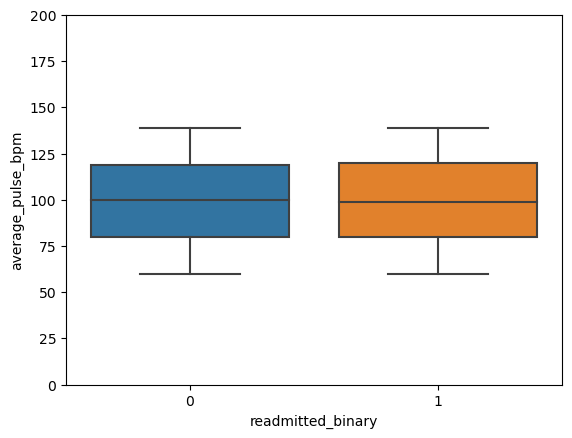

In [714]:
# give me information of average_pulse_bpm in regards to readmitted_binary
data_train_copy.groupby(['readmitted_binary'])['average_pulse_bpm'].describe()
# plot the relationship between average_pulse_bpm and readmitted_binary
sns.boxplot(x='readmitted_binary', y='average_pulse_bpm', data=data_train_copy)
plt.ylim(0, 200)
plt.show()


In [715]:
# drop average_pulse_bpm
data_train_copy.drop(['average_pulse_bpm'], axis=1, inplace=True)

In [716]:
data_validation_copy.drop(['average_pulse_bpm'], axis=1, inplace=True)

### discharge_disposition

In [717]:
# fill missing values with 'Not Mapped'
data_train_copy['discharge_disposition'] = data_train_copy['discharge_disposition'].fillna('Not Mapped')
data_validation_copy['discharge_disposition'] = data_validation_copy['discharge_disposition'].fillna('Not Mapped')

In [718]:
data_train_copy['discharge_disposition'].value_counts()

discharge_disposition
Discharged to home                                                                                           42254
Discharged/transferred to SNF                                                                                 9780
Discharged/transferred to home with home health service                                                       9005
Not Mapped                                                                                                    3269
Discharged/transferred to another short term hospital                                                         1488
Discharged/transferred to another rehab fac including rehab units of a hospital .                             1392
Expired                                                                                                       1135
Discharged/transferred to another type of inpatient care institution                                           822
Discharged/transferred to ICF                             

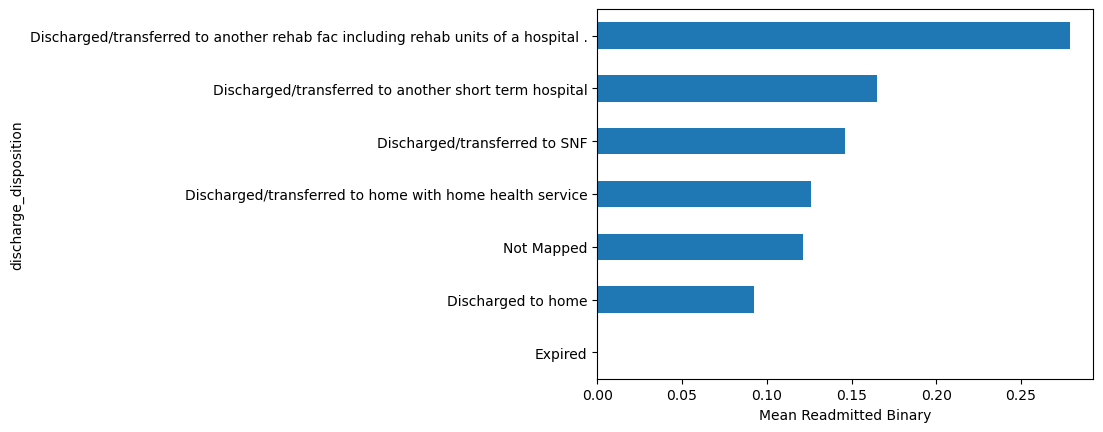

In [719]:
data_train_copy.groupby(['discharge_disposition'])['readmitted_binary'].mean()[data_train_copy['discharge_disposition'].value_counts() > 1000].sort_values().plot(kind='barh')
plt.xlabel('Mean Readmitted Binary')
plt.show()
# save theses values in a list 
discharge_disposition_list = data_train_copy.groupby(['discharge_disposition'])['readmitted_binary'].mean()[data_train_copy['discharge_disposition'].value_counts() > 1000].sort_values().index.tolist()




In [720]:
discharge_disposition_list.remove('Expired')
discharge_disposition_list.remove('Not Mapped')


In [721]:
# create a new column discharge_disposition_new indicating whether the patient has a value in discharge_disposition_list
data_train_copy['discharge_disposition_new'] = data_train_copy['discharge_disposition'].apply(lambda x: 1 if x in discharge_disposition_list else 0)
data_validation_copy['discharge_disposition_new'] = data_validation_copy['discharge_disposition'].apply(lambda x: 1 if x in discharge_disposition_list else 0)

In [722]:
# create a column indicating whether the patient was expired or not
data_train_copy['expired'] = np.where(data_train_copy['discharge_disposition'] == 'Expired', 1, 0)
data_validation_copy['expired'] = np.where(data_validation_copy['discharge_disposition'] == 'Expired', 1, 0)

In [723]:
# drop discharge_disposition
data_train_copy.drop(['discharge_disposition'], axis=1, inplace=True)
data_validation_copy.drop(['discharge_disposition'], axis=1, inplace=True)

### admission_source

In [724]:
# fill missing values with 'Not Mapped'
data_train_copy['admission_source'] = data_train_copy['admission_source'].fillna('Not Mapped')
data_validation_copy['admission_source'] = data_validation_copy['admission_source'].fillna('Not Mapped')

In [725]:
# replace not mapped values with 'Not Available'
data_train_copy['admission_source'] = data_train_copy['admission_source'].replace('Not Mapped', 'Not Available')
data_validation_copy['admission_source'] = data_validation_copy['admission_source'].replace('Not Mapped', 'Not Available')

In [726]:
data_train_copy['admission_source'].value_counts()

admission_source
 Emergency Room                                               40317
 Physician Referral                                           20677
Not Available                                                  4718
Transfer from a hospital                                       2230
 Transfer from another health care facility                    1562
Clinic Referral                                                 779
 Transfer from a Skilled Nursing Facility (SNF)                 595
HMO Referral                                                    129
 Not Mapped                                                     107
 Not Available                                                   88
 Court/Law Enforcement                                           11
 Transfer from hospital inpt/same fac reslt in a sep claim        8
 Transfer from critial access hospital                            7
 Transfer from Ambulatory Surgery Center                          2
 Extramural Birth              

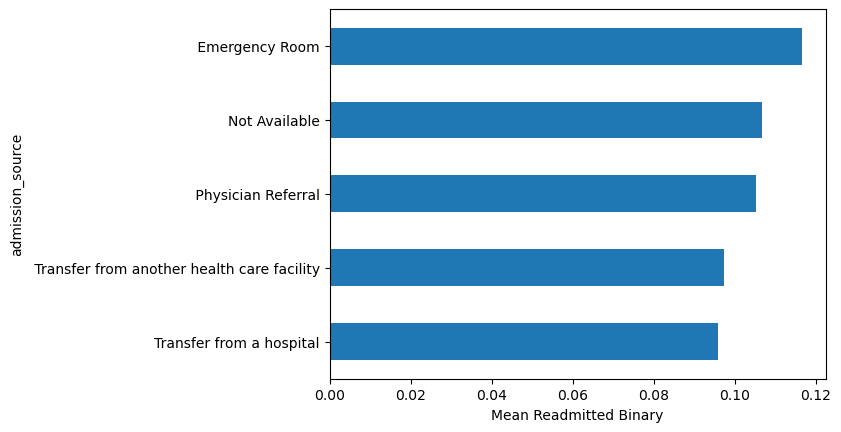

In [727]:
data_train_copy.groupby(['admission_source'])['readmitted_binary'].mean()[
    data_train_copy['admission_source'].value_counts() > 1000
].sort_values().plot(kind='barh')
plt.xlabel('Mean Readmitted Binary')
plt.show()
# save theses values in a list
admission_source_list = data_train_copy.groupby(['admission_source'])['readmitted_binary'].mean()[
    data_train_copy['admission_source'].value_counts() > 1000
].sort_values().index.tolist()
# remove 'Not Available'
admission_source_list.remove('Not Available')

In [728]:
# create a new column admission_source_new indicating whether the patient has a value in admission_source_list
data_train_copy['admission_source_new'] = data_train_copy['admission_source'].apply(lambda x: 1 if x in admission_source_list else 0)
data_validation_copy['admission_source_new'] = data_validation_copy['admission_source'].apply(lambda x: 1 if x in admission_source_list else 0)
# drop admission_source
data_train_copy.drop(['admission_source'], axis=1, inplace=True)
data_validation_copy.drop(['admission_source'], axis=1, inplace=True)

In [729]:
# # hot encode admission_source
# data_train_copy = pd.get_dummies(data_train_copy, columns=['admission_source'], prefix='admission_source').replace({True: 1, False: 0})
# data_validation_copy = pd.get_dummies(data_validation_copy, columns=['admission_source'], prefix='admission_source').replace({True: 1, False: 0})

### length_of_stay_in_hospital

In [730]:
data_train_copy['length_of_stay_in_hospital'].value_counts()

length_of_stay_in_hospital
3     12434
2     12119
1     10008
4      9656
5      6967
6      5237
7      4154
8      3002
9      2105
10     1637
11     1322
12     1010
13      859
14      723
Name: count, dtype: int64

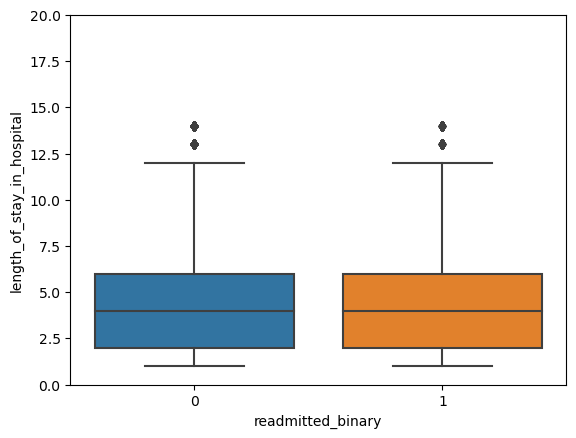

In [731]:
# plot the relationship between length_of_stay_in_hospital and readmitted_binary
sns.boxplot(x='readmitted_binary', y='length_of_stay_in_hospital', data=data_train_copy)
plt.ylim(0, 20)
plt.show()


In [732]:
# drop length_of_stay_in_hospital
data_train_copy.drop(['length_of_stay_in_hospital'], axis=1, inplace=True)
data_validation_copy.drop(['length_of_stay_in_hospital'], axis=1, inplace=True)

### number_lab_tests

In [733]:
data_train_copy['number_lab_tests'].value_counts()


number_lab_tests
1      2183
43     1965
44     1787
45     1672
40     1553
       ... 
105       2
121       1
114       1
118       1
107       1
Name: count, Length: 114, dtype: int64

### non_lab_procedures

In [734]:
data_train_copy['non_lab_procedures'].value_counts()

non_lab_procedures
0    32632
1    14532
2     8895
3     6614
6     3478
4     2928
5     2154
Name: count, dtype: int64

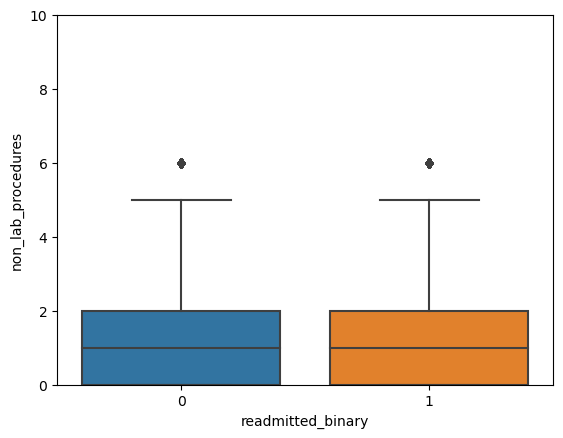

In [735]:
# plot the relationship between non_lab_procedures and readmitted_binary
sns.boxplot(x='readmitted_binary', y='non_lab_procedures', data=data_train_copy)
plt.ylim(0, 10)
plt.show()


In [736]:
# drop non_lab_procedures
data_train_copy.drop(['non_lab_procedures'], axis=1, inplace=True)
data_validation_copy.drop(['non_lab_procedures'], axis=1, inplace=True)

### number_of_medications

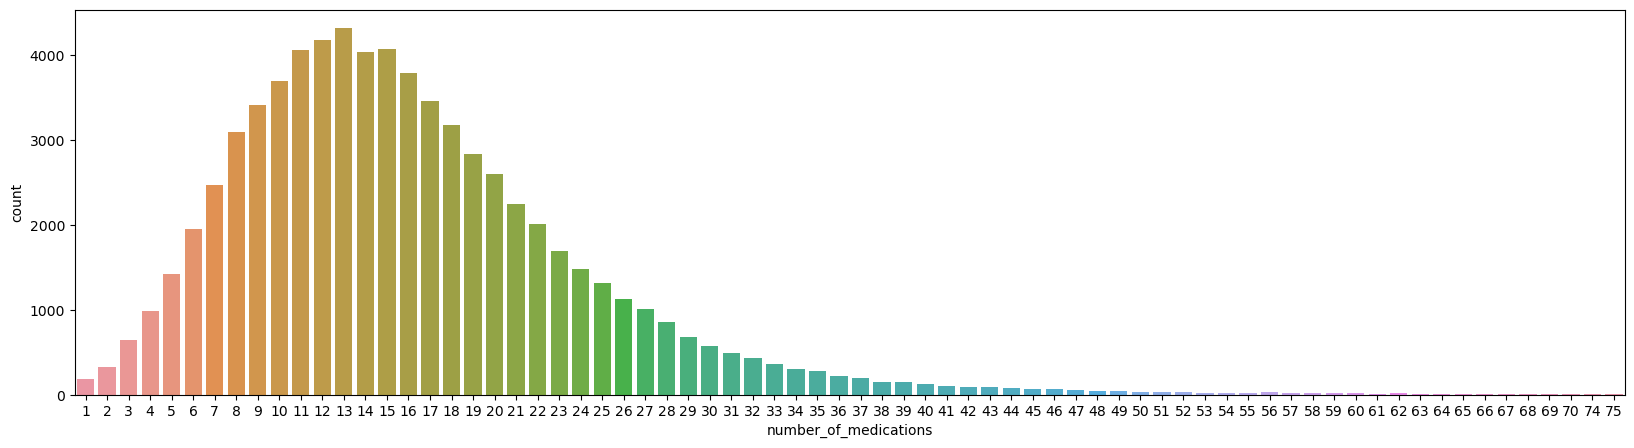

In [737]:
plt.figure(figsize=(20, 5))
# barplot of number of medications
sns.countplot(x='number_of_medications', data=data_train_copy)
plt.show()

### primary_diagnosis, secondary_diagnosis, additional_dioagnosis

In [738]:
data_train_copy['primary_diagnosis'].value_counts()

primary_diagnosis
428       4776
414       4595
786       2846
410       2513
486       2488
          ... 
906          1
649          1
250.51       1
903          1
299          1
Name: count, Length: 686, dtype: int64

<Axes: ylabel='primary_diagnosis'>

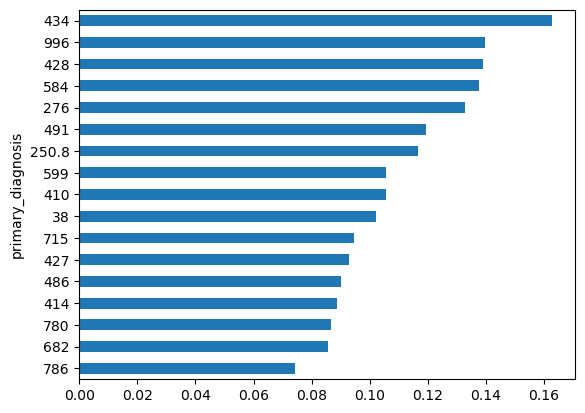

In [739]:
# get the average readmitted_binary for primary_diagnosis with more than 1000 counts
data_train.groupby(['primary_diagnosis'])['readmitted_binary'].mean()[data_train['primary_diagnosis'].value_counts() > 1000].sort_values().plot(kind='barh')

In [740]:
data_train_copy['secondary_diagnosis'].value_counts()

secondary_diagnosis
276     4694
428     4685
250     4257
427     3537
401     2624
        ... 
833        1
E868       1
179        1
944        1
E968       1
Name: count, Length: 698, dtype: int64

In [741]:
data_train_copy.groupby(['primary_diagnosis'])['readmitted_binary'].mean().sort_values(ascending=False)

primary_diagnosis
906    1.0
23     1.0
904    1.0
543    1.0
299    1.0
      ... 
523    0.0
11     0.0
521    0.0
510    0.0
V71    0.0
Name: readmitted_binary, Length: 686, dtype: float64

In [742]:
data_train_copy.groupby(['secondary_diagnosis'])['readmitted_binary'].mean().sort_values(ascending=False)

secondary_diagnosis
975     1.0
E945    1.0
114     1.0
894     1.0
341     1.0
       ... 
706     0.0
323     0.0
704     0.0
702     0.0
V86     0.0
Name: readmitted_binary, Length: 698, dtype: float64

In [743]:
# Mapping function
def map_icd9_code(code):
    code_str = str(code)  # Convert code to string

    try:
        code_int = int(float(code_str))  # Convert to integer if possible
    except ValueError:
        code_int = None  # Keep the code as None if it's not a number

    if code_int is not None:
        if 1 <= code_int <= 139:
            return 'Infectious and Parasitic Diseases'
        elif 140 <= code_int <= 239:
            return 'Neoplasms'
        elif 240 <= code_int <= 279:
            return 'Endocrine, Nutritional, Metabolic Diseases, and Immunity Disorders'
        elif 280 <= code_int <= 289:
            return 'Diseases of the Blood and Blood-forming Organs'
        elif 290 <= code_int <= 319:
            return 'Mental Disorders'
        elif 320 <= code_int <= 389:
            return 'Diseases of the Nervous System and Sense Organs'
        elif 390 <= code_int <= 459:
            return 'Diseases of the Circulatory System'
        elif 460 <= code_int <= 519:
            return 'Diseases of the Respiratory System'
        elif 520 <= code_int <= 579:
            return 'Diseases of the Digestive System'
        elif 580 <= code_int <= 629:
            return 'Diseases of the Genitourinary System'
        elif 630 <= code_int <= 679:
            return 'Complications of Pregnancy, Childbirth, and the Puerperium'
        elif 680 <= code_int <= 709:
            return 'Diseases of the Skin and Subcutaneous Tissue'
        elif 710 <= code_int <= 739:
            return 'Diseases of the Musculoskeletal System and Connective Tissue'
        elif 740 <= code_int <= 759:
            return 'Congenital Anomalies'
        elif 760 <= code_int <= 779:
            return 'Certain Conditions Originating in the Perinatal Period'
        elif 780 <= code_int <= 799:
            return 'Symptoms, Signs, and Ill-Defined Conditions'
        elif 800 <= code_int <= 999:
            return 'Injury and Poisoning'
    else:
        if code_str.startswith('E') or code_str.startswith('V'):
            return 'external causes of injury and supplemental classification'
        # Handle other alphanumeric codes if necessary

    return 'Unknown Category'  # Default category for anything else

data_train_copy['primary_diagnosis'] = data_train_copy['primary_diagnosis'].apply(map_icd9_code)

In [744]:
data_train_copy['secondary_diagnosis'] = data_train_copy['secondary_diagnosis'].apply(map_icd9_code)

In [745]:
# def encode_diagnosis(x):
#     if pd.isna(x):
#         return 0
#     elif x < 0:
#         return 17
#     elif 1 <= x < 140:
#         return 0
#     elif 140 <= x < 240:
#         return 1
#     elif 240 <= x < 280:
#         return 2
#     elif 280 <= x < 290:
#         return 3
#     elif 290 <= x < 320:
#         return 4
#     elif 320 <= x < 390:
#         return 5
#     elif 390 <= x < 460:
#         return 6
#     elif 460 <= x < 520:
#         return 7
#     elif 520 <= x < 580:
#         return 8
#     elif 580 <= x < 630:
#         return 9
#     elif 630 <= x < 680:
#         return 10
#     elif 680 <= x < 710:
#         return 11
#     elif 710 <= x < 740:
#         return 12
#     elif 740 <= x < 760:
#         return 13
#     elif 760 <= x < 780:
#         return 14
#     elif 780 <= x < 800:
#         return 15
#     elif 800 <= x < 1000:
#         return 16
#     else:
#         return x

# # Encode 'primary_diagnosis' column
# data_train_copy['primary_diagnosis'] = data_train_copy['primary_diagnosis'].astype(str)
# data_train_copy['primary_diagnosis'] = data_train_copy['primary_diagnosis'].str.replace('?', '0')
# data_train_copy['primary_diagnosis'] = data_train_copy['primary_diagnosis'].str.replace('V', '-')
# data_train_copy['primary_diagnosis'] = pd.to_numeric(data_train_copy['primary_diagnosis'], errors='coerce', downcast='integer')
# data_train_copy['primary_diagnosis'] = data_train_copy['primary_diagnosis'].apply(lambda x: round(x) if not pd.isna(x) else x)
# data_train_copy['primary_diagnosis'] = data_train_copy['primary_diagnosis'].apply(encode_diagnosis)

# # Encode 'secondary_diagnosis' column
# data_train_copy['secondary_diagnosis'] = data_train_copy['secondary_diagnosis'].astype(str)
# data_train_copy['secondary_diagnosis'] = data_train_copy['secondary_diagnosis'].str.replace('?', '0')
# data_train_copy['secondary_diagnosis'] = data_train_copy['secondary_diagnosis'].str.replace('V', '-')
# data_train_copy['secondary_diagnosis'] = pd.to_numeric(data_train_copy['secondary_diagnosis'], errors='coerce', downcast='integer')
# data_train_copy['secondary_diagnosis'] = data_train_copy['secondary_diagnosis'].apply(lambda x: round(x) if not pd.isna(x) else x)
# data_train_copy['secondary_diagnosis'] = data_train_copy['secondary_diagnosis'].apply(encode_diagnosis)

# # Encode 'additional_diagnosis' column
# data_train_copy['additional_diagnosis'] = data_train_copy['additional_diagnosis'].astype(str)
# data_train_copy['additional_diagnosis'] = data_train_copy['additional_diagnosis'].str.replace('?', '0')
# data_train_copy['additional_diagnosis'] = data_train_copy['additional_diagnosis'].str.replace('V', '-')
# data_train_copy['additional_diagnosis'] = pd.to_numeric(data_train_copy['additional_diagnosis'], errors='coerce', downcast='integer')
# data_train_copy['additional_diagnosis'] = data_train_copy['additional_diagnosis'].apply(lambda x: round(x) if not pd.isna(x) else x)
# data_train_copy['additional_diagnosis'] = data_train_copy['additional_diagnosis'].apply(encode_diagnosis)


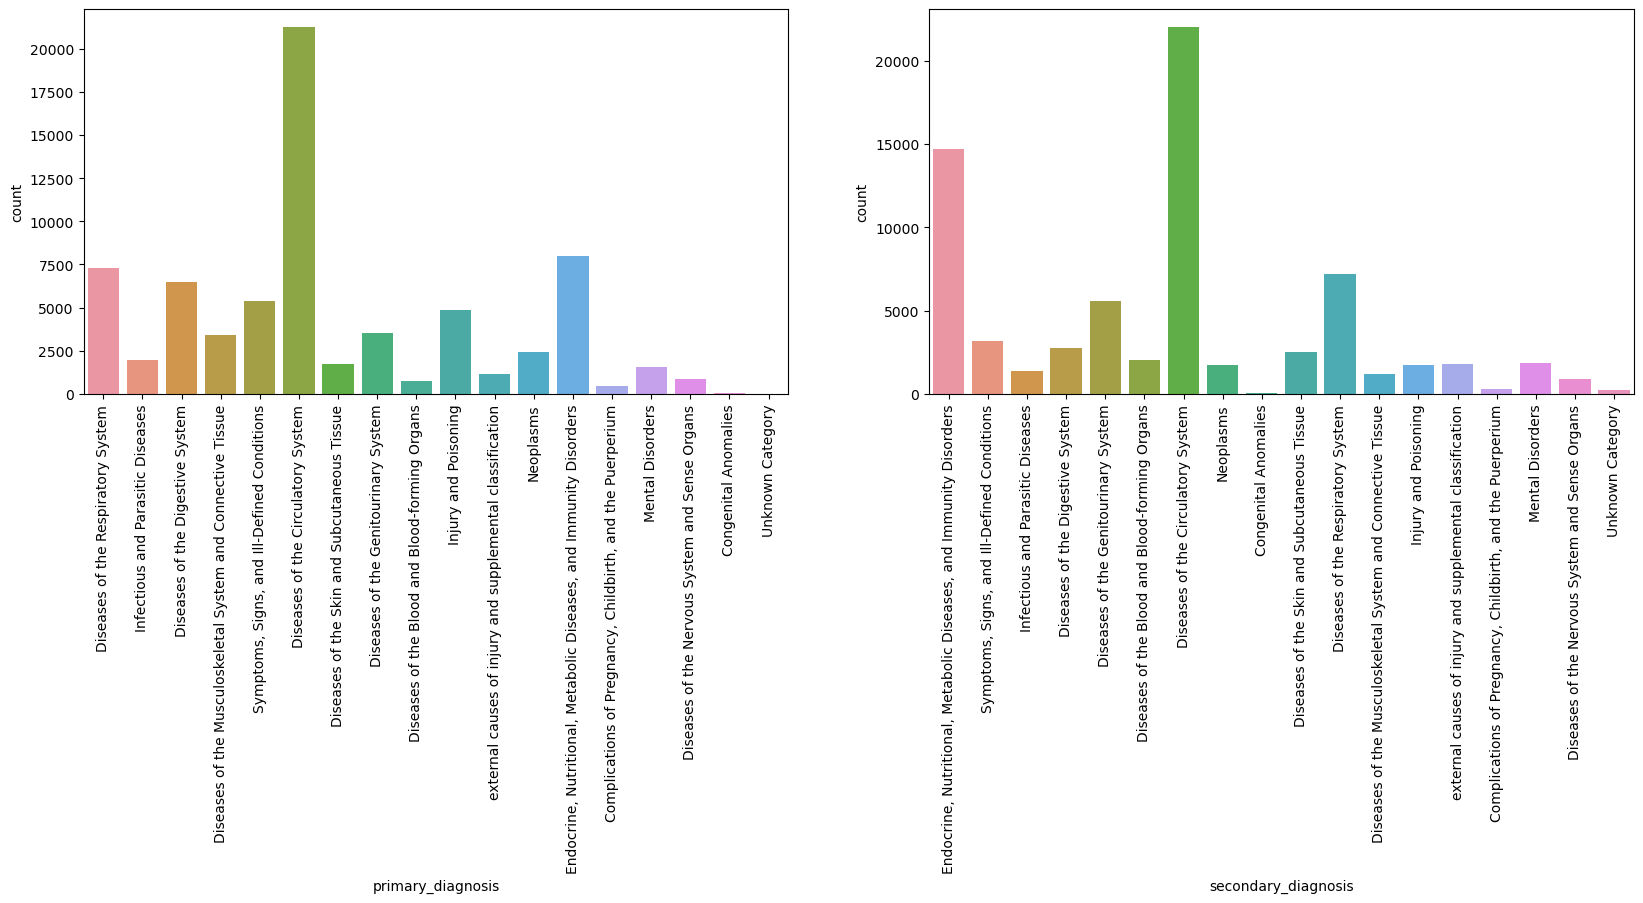

In [746]:
# check distribution of primary_diagnosis and secondary_diagnosis
# plt.figure(figsize=(20, 5))
# plt.subplot(1, 2, 1)
# sns.countplot(x='primary_diagnosis', data=data_train_copy)
# plt.subplot(1, 2, 2)
# sns.countplot(x='secondary_diagnosis', data=data_train_copy)
# plt.show()
# turn above plot 90 degrees and but the plots below each other
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='primary_diagnosis', data=data_train_copy)
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
sns.countplot(x='secondary_diagnosis', data=data_train_copy)
plt.xticks(rotation=90)
plt.show()




<function matplotlib.pyplot.show(close=None, block=None)>

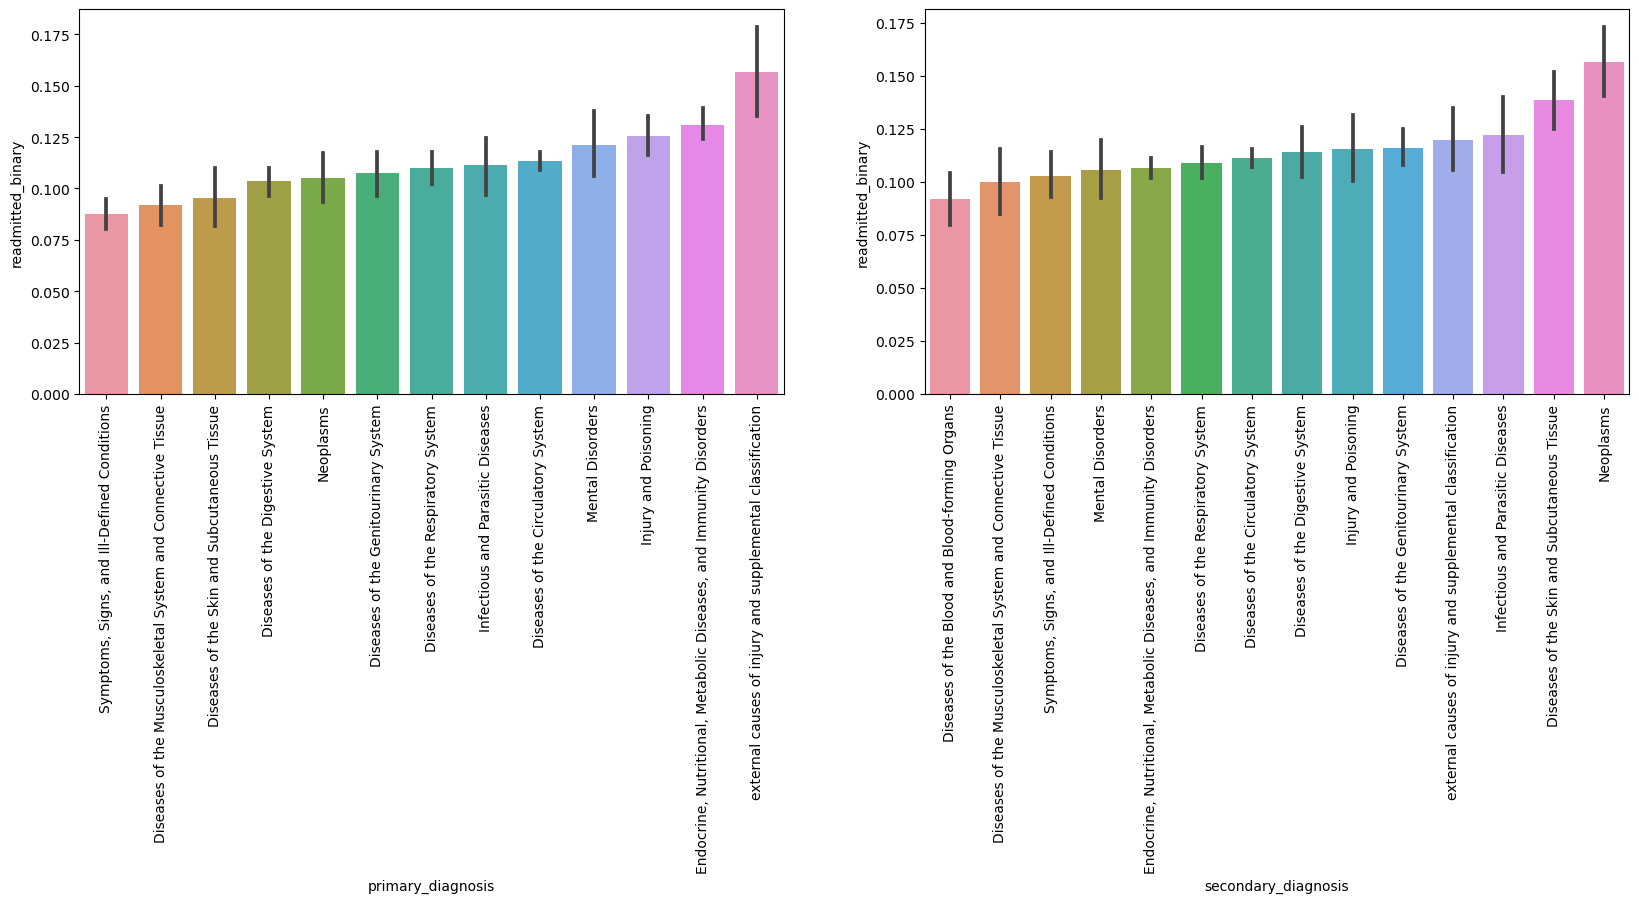

In [747]:
# plot readmitted_binary against primary_diagnosis and secondary_diagnosis

# only show the the ones with more than 1000 counts
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='primary_diagnosis', y='readmitted_binary', data=data_train_copy, order=data_train_copy.groupby(['primary_diagnosis'])['readmitted_binary'].mean()[data_train_copy['primary_diagnosis'].value_counts() > 1000].sort_values().index)
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
sns.barplot(x='secondary_diagnosis', y='readmitted_binary', data=data_train_copy, order=data_train_copy.groupby(['secondary_diagnosis'])['readmitted_binary'].mean()[data_train_copy['secondary_diagnosis'].value_counts() > 1000].sort_values().index)
plt.xticks(rotation=90)
plt.show



In [748]:

# show the above in table view
data_train_copy.groupby(['primary_diagnosis'])['readmitted_binary'].mean()[data_train_copy['primary_diagnosis'].value_counts() > 500].sort_values(ascending=False)

primary_diagnosis
external causes of injury and supplemental classification             0.156710
Diseases of the Blood and Blood-forming Organs                        0.139657
Endocrine, Nutritional, Metabolic Diseases, and Immunity Disorders    0.131090
Injury and Poisoning                                                  0.125641
Mental Disorders                                                      0.121270
Diseases of the Circulatory System                                    0.113373
Infectious and Parasitic Diseases                                     0.111280
Diseases of the Respiratory System                                    0.110136
Diseases of the Genitourinary System                                  0.107614
Neoplasms                                                             0.105198
Diseases of the Digestive System                                      0.103459
Diseases of the Nervous System and Sense Organs                       0.102233
Diseases of the Skin and Subcutane

In [749]:
# create a list primary_diagnosis_list with the values above only the top 3
primary_diagnosis_list = data_train_copy.groupby(['primary_diagnosis'])['readmitted_binary'].mean()[data_train_copy['primary_diagnosis'].value_counts() > 500].sort_values(ascending=False).index.tolist()[:3]
# create a new column primary_diagnosis_new indicating whether the patient has a value in primary_diagnosis_list
data_train_copy['primary_diagnosis_new'] = data_train_copy['primary_diagnosis'].apply(lambda x: 1 if x in primary_diagnosis_list else 0)
data_validation_copy['primary_diagnosis_new'] = data_validation_copy['primary_diagnosis'].apply(lambda x: 1 if x in primary_diagnosis_list else 0)

# create a list secondary_diagnosis_list with the values above only the top 3
secondary_diagnosis_list = data_train_copy.groupby(['secondary_diagnosis'])['readmitted_binary'].mean()[data_train_copy['secondary_diagnosis'].value_counts() > 500].sort_values(ascending=False).index.tolist()[:3]
# create a new column secondary_diagnosis_new indicating whether the patient has a value in secondary_diagnosis_list
data_train_copy['secondary_diagnosis_new'] = data_train_copy['secondary_diagnosis'].apply(lambda x: 1 if x in secondary_diagnosis_list else 0)
data_validation_copy['secondary_diagnosis_new'] = data_validation_copy['secondary_diagnosis'].apply(lambda x: 1 if x in secondary_diagnosis_list else 0)

#drop primary_diagnosis and secondary_diagnosis
data_train_copy.drop(['primary_diagnosis', 'secondary_diagnosis'], axis=1, inplace=True)
data_validation_copy.drop(['primary_diagnosis', 'secondary_diagnosis'], axis=1, inplace=True)


In [750]:
# drop additional_diagnosis
data_train_copy.drop(['additional_diagnosis'], axis=1, inplace=True)
data_validation_copy.drop(['additional_diagnosis'], axis=1, inplace=True)

### number_diagnoses

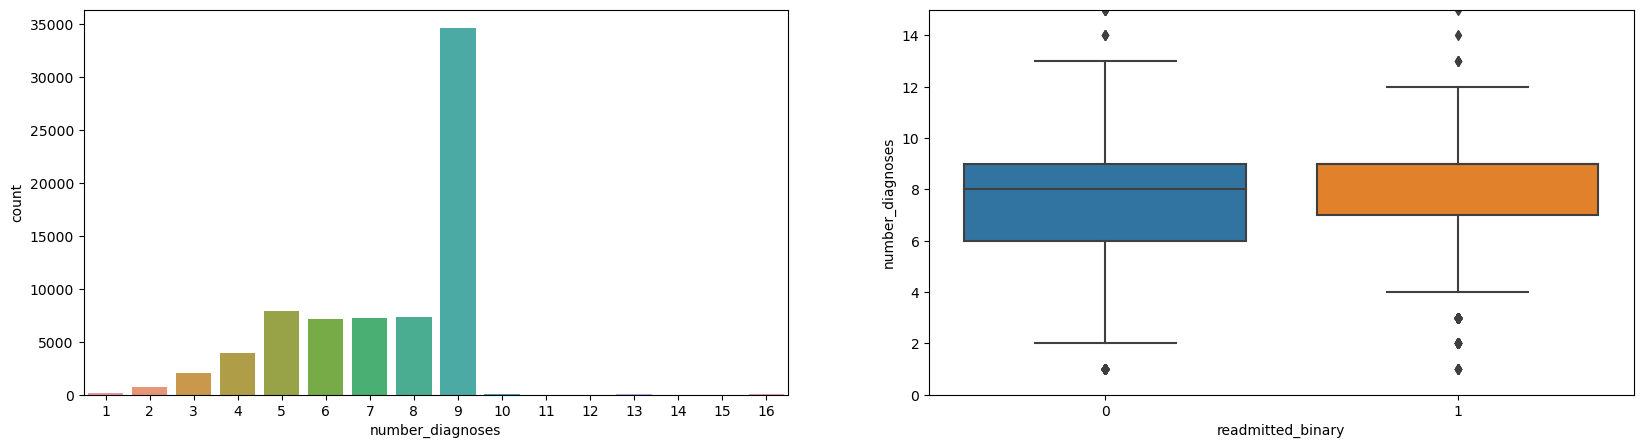

In [751]:
# investigate number_diagnoses in several plots
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='number_diagnoses', data=data_train_copy)
plt.subplot(1, 2, 2)
sns.boxplot(x='readmitted_binary', y='number_diagnoses', data=data_train_copy)
plt.ylim(0, 15)
plt.show()


### glucose_test_result

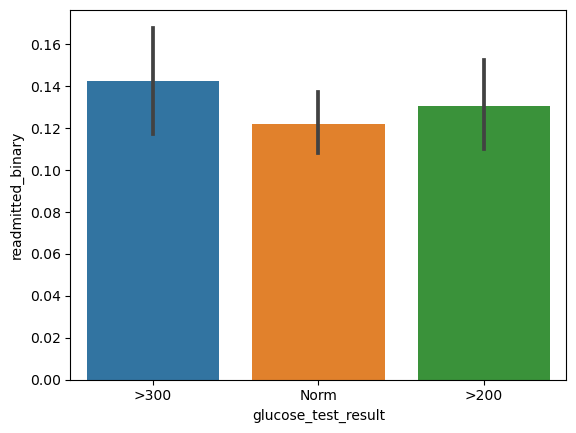

In [752]:
# plot mean of readmitted_binary in regards to glucose_test_result
sns.barplot(x='glucose_test_result', y='readmitted_binary', data=data_train_copy)
plt.show()



In [753]:
# fill missing values with 'Not Performed'
data_train_copy['glucose_test_result'] = data_train_copy['glucose_test_result'].fillna('Not Performed')
data_validation_copy['glucose_test_result'] = data_validation_copy['glucose_test_result'].fillna('Not Performed')

# encode glucose_test_result
data_train_copy['glucose_test_result'] = data_train_copy['glucose_test_result'].replace({'Not Performed': 0, 'Norm': 1, '>200': 2, '>300': 3})
data_validation_copy['glucose_test_result'] = data_validation_copy['glucose_test_result'].replace({'Not Performed': 0, 'Norm': 1, '>200': 2, '>300': 3})

### a1c_test_result

In [754]:
# fill missing values with 'Not Performed'
data_train_copy['a1c_test_result'] = data_train_copy['a1c_test_result'].fillna('Not Performed')
data_validation_copy['a1c_test_result'] = data_validation_copy['a1c_test_result'].fillna('Not Performed')

# encode a1c_test_result
data_train_copy['a1c_test_result'] = data_train_copy['a1c_test_result'].replace({'Not Performed': 0, 'Norm': 1, '>7': 2, '>8': 3})
data_validation_copy['a1c_test_result'] = data_validation_copy['a1c_test_result'].replace({'Not Performed': 0, 'Norm': 1, '>7': 2, '>8': 3})

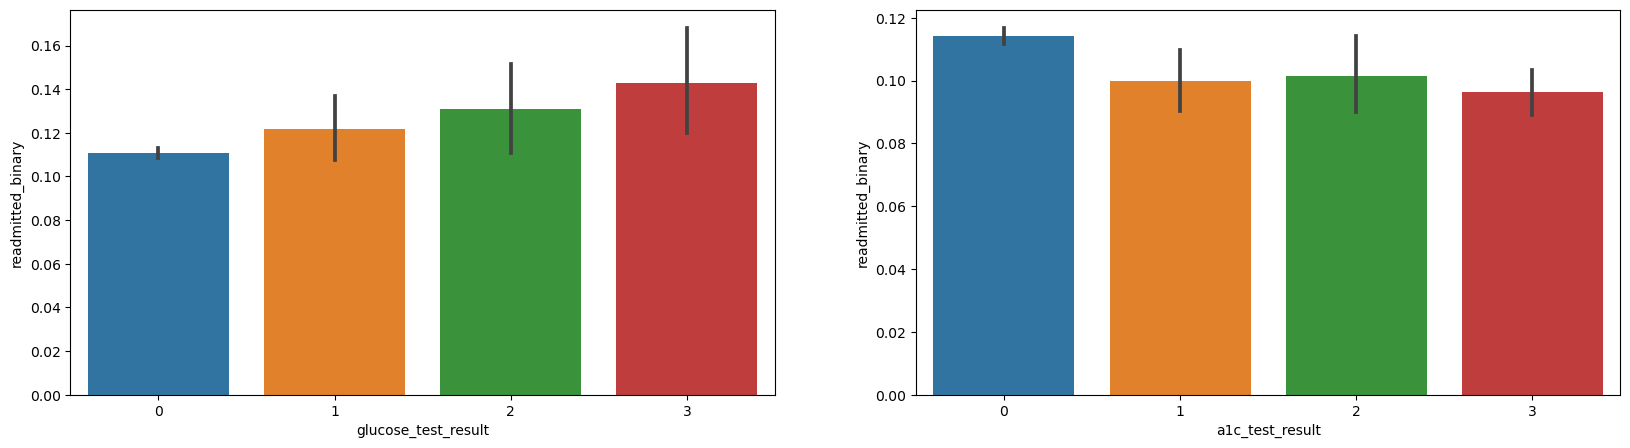

In [755]:
# plot dependency of readmitted_binary on a1c_test_result and readmitted_binary on glucose_test_result
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='glucose_test_result', y='readmitted_binary', data=data_train_copy)
plt.subplot(1, 2, 2)
sns.barplot(x='a1c_test_result', y='readmitted_binary', data=data_train_copy)
plt.show()

### change_in_meds_during_hospitalization

In [756]:
# replace 'Ch' and 'No' with 1 and 0
data_train_copy['change_in_meds_during_hospitalization'] = data_train_copy['change_in_meds_during_hospitalization'].replace({'Ch': 1, 'No': 0})
data_validation_copy['change_in_meds_during_hospitalization'] = data_validation_copy['change_in_meds_during_hospitalization'].replace({'Ch': 1, 'No': 0})

### prescribed_diabetes_meds

In [757]:
# replace 'Yes' and 'No' with 1 and 0
data_train_copy['prescribed_diabetes_meds'] = data_train_copy['prescribed_diabetes_meds'].replace({'Yes': 1, 'No': 0})
data_validation_copy['prescribed_diabetes_meds'] = data_validation_copy['prescribed_diabetes_meds'].replace({'Yes': 1, 'No': 0})


### medication

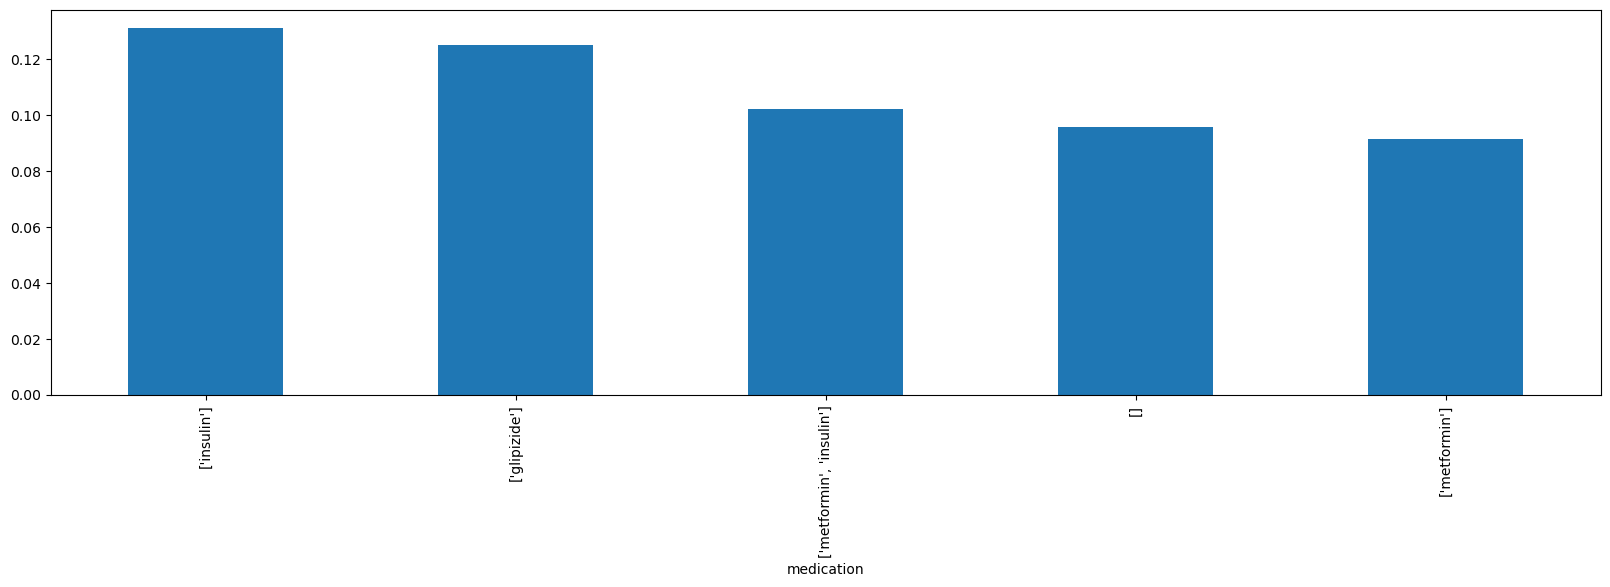

In [758]:
plt.figure(figsize=(20, 5))
data_train_copy[data_train_copy['medication'].isin(data_train_copy['medication'].value_counts().head(5).index)].groupby('medication')['readmitted_binary'].mean().sort_values(ascending=False).plot.bar()
plt.show()

In [759]:
# let's create another column whether any of the three diabetes medications has been prescribed
data_train_copy['any_medication'] = data_train_copy['medication'].apply(lambda x: 1 if ('insulin' in x) or ('glipizide' in x) or ('metformin' in x) else 0)
data_validation_copy['any_medication'] = data_validation_copy['medication'].apply(lambda x: 1 if ('insulin' in x) or ('glipizide' in x) or ('metformin' in x) else 0)
# drop medication column
data_train_copy.drop(['medication'], axis=1, inplace=True)
data_validation_copy.drop(['medication'], axis=1, inplace=True)


## Imputing missing values

In [760]:
# impute missing values in age with KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data_train_copy['age'] = imputer.fit_transform(data_train_copy[['age']])
data_validation_copy['age'] = imputer.transform(data_validation_copy[['age']])

# Feature Engineering

In [761]:
# drop patient_id
data_train_copy.drop(['patient_id'], axis=1, inplace=True)
data_validation_copy.drop(['patient_id'], axis=1, inplace=True)

In [762]:
data_train_copy.head()

,gender,age,number_lab_tests,number_of_medications,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,readmitted_binary,...,race_Other,race_Unknown,sum_visits,admission_type_new,discharge_disposition_new,expired,admission_source_new,primary_diagnosis_new,secondary_diagnosis_new,any_medication
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,0,8.0,48,20,8,0,0,0,0,0,...,0,0,2,1,1,0,1,0,0,0
426224,1,6.0,71,25,9,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
634063,0,7.0,60,22,6,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
890610,1,7.0,48,9,5,0,0,0,0,0,...,0,0,1,1,1,0,1,0,0,0
654194,0,8.0,47,15,9,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0


In [763]:
data_train_copy.columns

Index(['gender', 'age', 'number_lab_tests', 'number_of_medications',
       'number_diagnoses', 'glucose_test_result', 'a1c_test_result',
       'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds',
       'readmitted_binary', 'readmitted_multiclass', 'race_AfricanAmerican',
       'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other',
       'race_Unknown', 'sum_visits', 'admission_type_new',
       'discharge_disposition_new', 'expired', 'admission_source_new',
       'primary_diagnosis_new', 'secondary_diagnosis_new', 'any_medication'],
      dtype='object')

In [764]:
# define numerical columns
numerical_columns = ['age', 'number_lab_tests', 'number_of_medications', 'number_diagnoses', 'sum_visits', 'glucose_test_result', 'a1c_test_result']

In [765]:
# dtypes of data_train_copy
data_train_copy.dtypes

gender                                     int64
age                                      float64
number_lab_tests                           int64
number_of_medications                      int64
number_diagnoses                           int64
glucose_test_result                        int64
a1c_test_result                            int64
change_in_meds_during_hospitalization      int64
prescribed_diabetes_meds                   int64
readmitted_binary                          int64
readmitted_multiclass                     object
race_AfricanAmerican                       int64
race_Asian                                 int64
race_Caucasian                             int64
race_Hispanic                              int64
race_Other                                 int64
race_Unknown                               int64
sum_visits                                 int64
admission_type_new                         int32
discharge_disposition_new                  int64
expired             

# Models

### Preparation

In [766]:
# Extract features and target variable
X = data_train_copy.drop(['readmitted_binary', 'readmitted_multiclass'], axis=1)
y = data_train_copy['readmitted_binary']

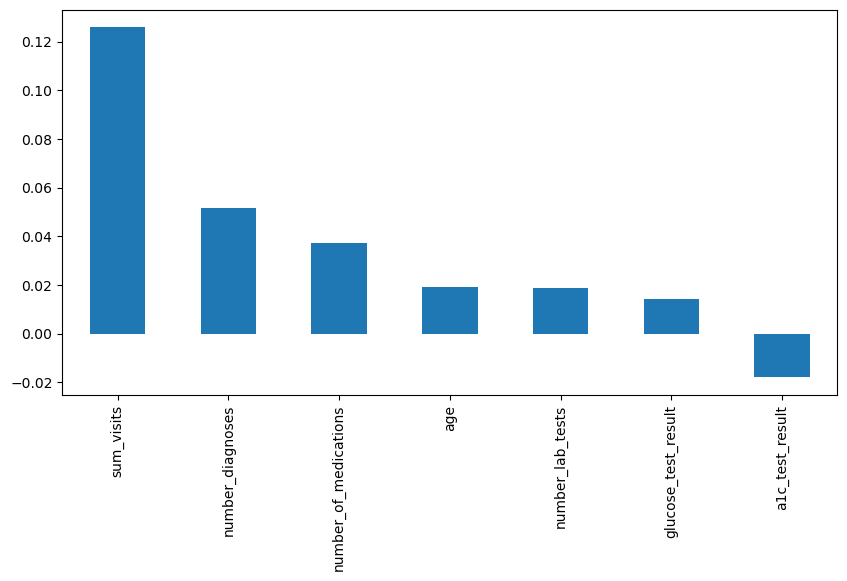

In [767]:
# get correlation of numerical columns from X with target variable y and show plot in descending order
correlations = X[numerical_columns].corrwith(y).sort_values(ascending=False)
correlations.plot.bar(figsize=(10, 5))
plt.show()


In [768]:
# perform chi-square test for numerical columns and give p-value
for col in numerical_columns:
    print(col, chi2_contingency(pd.crosstab(data_train_copy['readmitted_binary'], data_train_copy[col]))[1])



age 2.324765913948918e-25
number_lab_tests 0.00024866219053321255
number_of_medications 1.3466497548101552e-21
number_diagnoses 7.00703621584023e-34
sum_visits 4.809613643168867e-275
glucose_test_result 0.002300818034752406
a1c_test_result 1.3218068308810437e-05


In [769]:
# drop glucose_test_result, number_lab_tests, a1c_test_result
data_train_copy.drop(['glucose_test_result', 'number_lab_tests', 'a1c_test_result'], axis=1, inplace=True)

In [771]:
# define categorical columns by using X and excluding numerical columns
categorical_columns = [col for col in X.columns if col not in numerical_columns]


# correlation of categorical columns with target variable y
for col in categorical_columns:
    print(col, stats.pointbiserialr(X[col], y))




gender SignificanceResult(statistic=-0.005859943465844962, pvalue=0.1178231483810465)
change_in_meds_during_hospitalization SignificanceResult(statistic=0.02014615127961649, pvalue=7.5585690999226e-08)
prescribed_diabetes_meds SignificanceResult(statistic=0.027375854011465556, pvalue=2.717075017751477e-13)
race_AfricanAmerican SignificanceResult(statistic=0.0021592807042324167, pvalue=0.564417815248649)
race_Asian SignificanceResult(statistic=-0.0037238271889841437, pvalue=0.3202923579108587)
race_Caucasian SignificanceResult(statistic=0.02044115909912969, pvalue=4.866519397158161e-08)
race_Hispanic SignificanceResult(statistic=-0.0021524490809174614, pvalue=0.5656506620701915)
race_Other SignificanceResult(statistic=-0.009020744320153914, pvalue=0.016057795375127814)
race_Unknown SignificanceResult(statistic=-0.03761197653224928, pvalue=9.980573545910783e-24)
admission_type_new SignificanceResult(statistic=0.013049526325872963, pvalue=0.0004959359122197899)
discharge_disposition_new S

In [772]:
# drop all features above significance level 0.05
X.drop(columns=['gender', 'race_AfricanAmerican', 'race_Asian', 'race_Hispanic', 'discharge_disposition_new', 'admission_source_new'], inplace=True)


In [773]:
# drop some other features near significance level 0.05
X.drop(columns=['admission_type_new', 'race_Other', 'race_Unknown', 'race_Caucasian'], inplace=True)

In [774]:
# scale all columns of X with MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


### Oversampling

In [775]:
## Splitting and oversampling

# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution
unique, counts = np.unique(y_train_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{0: 50568, 1: 50568}


### Modelling

In [776]:
feature_names = X.columns

In [777]:
# X_train_resapled to dataframe
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X.columns)

In [778]:
from itertools import combinations

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
y = pd.DataFrame(y, columns=['readmitted_binary'])

# Placeholder for the best combination and its f1 score
best_combination = None
best_f1_score = 0

# Iterate over all possible combinations of features
for subset in combinations(feature_names, len(feature_names)):
    # Select only the features in the current combination
    X_subset = X_scaled[list(subset)]

    # Split into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_subset, y, test_size=0.2, random_state=42)

    # Apply SMOTE to oversample the minority class
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Train the logistic regression model
    model = LogisticRegression()
    model.fit(X_train_resampled, y_train_resampled)

    # Predict on the validation set
    y_pred = model.predict(X_val)

    # Calculate the f1 score
    score = f1_score(y_val, y_pred)

    # Check if this is the best score so far
    if score > best_f1_score:
        best_f1_score = score
        best_combination = subset

# Output the best combination and its f1 score
best_combination, best_f1_score

(('age',
  'number_lab_tests',
  'number_of_medications',
  'number_diagnoses',
  'glucose_test_result',
  'a1c_test_result',
  'change_in_meds_during_hospitalization',
  'prescribed_diabetes_meds',
  'sum_visits',
  'expired',
  'primary_diagnosis_new',
  'secondary_diagnosis_new',
  'any_medication'),
 0.23491257755217146)

In [779]:
X_scaled.columns

Index(['age', 'number_lab_tests', 'number_of_medications', 'number_diagnoses',
       'glucose_test_result', 'a1c_test_result',
       'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds',
       'sum_visits', 'expired', 'primary_diagnosis_new',
       'secondary_diagnosis_new', 'any_medication'],
      dtype='object')

In [780]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 4],
#     'min_samples_leaf': [1, 2]
# }



# # Create the RandomForest model
# rf_model = RandomForestClassifier(random_state=42)

# # Create the GridSearchCV object
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# grid_search.fit(X_train_resampled, y_train_resampled)

# grid_search.best_params_

# # use the best parameters to create a new model with RandomForestClassifier automatically
# rf_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
# rf_model.fit(X_train_resampled, y_train_resampled)
# # make predictions
# y_pred = rf_model.predict(X_test)
# # calculate f1 score
# f1_score(y_test, y_pred)


In [781]:
# # create a model with support vector machine
# model = SVC(random_state=42)
# model.fit(X_train_resampled, y_train_resampled)
# # make predictions
# y_pred = model.predict(X_test)
# # calculate f1 score
# f1_score(y_test, y_pred)

In [782]:
# create a model with MLPClassifier
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)
# make predictions
y_pred = model.predict(X_test)
# calculate f1 score
f1_score(y_test, y_pred)

0.23049759229534508

In [783]:
# create a model with KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train_resampled, y_train_resampled)
# make predictions
y_pred = model.predict(X_test)
# calculate f1 score
f1_score(y_test, y_pred)

0.18714027298141753

In [784]:
# create a model with XGBClassifier
from xgboost import XGBClassifier
model = XGBClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)
# make predictions
y_pred = model.predict(X_test)
# calculate f1 score
f1_score(y_test, y_pred)

0.02848297213622291

In [786]:
# create a randomforest model and gridsearch then use the best parameters to create a new model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}
# Create the RandomForest model
rf_model = RandomForestClassifier(random_state=42)
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)
# use the best parameters to create a new model with RandomForestClassifier automatically
rf_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
# make predictions
y_pred = rf_model.predict(X_test)
# calculate f1 score
f1_score(y_test, y_pred)




Fitting 3 folds for each of 36 candidates, totalling 108 fits


0.10352941176470588